In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

import cv2

In [2]:
print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU NOT AVAILABLE" if len(tf.config.list_physical_devices('GPU'))==0 else "GPU AVAILABLE")

TF Version:  2.4.1
TF-Hub version:  0.11.0
Eager mode enabled:  True
GPU NOT AVAILABLE


In [3]:
#content_image_path = '.\\Images\\rabbit.jpg'
#style_image_path = '.\\Images\\style.jpg'

content_image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 
                                             'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_image_path = tf.keras.utils.get_file('kandinsky5.jpg',
                                           'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

(-0.5, 699.5, 576.5, -0.5)

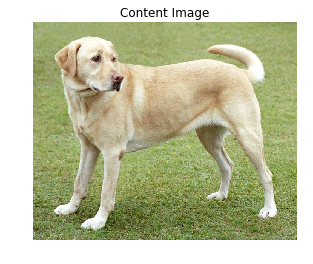

In [4]:
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)

plt.title('Content Image')
plt.imshow(content_image)
plt.axis('off')

(-0.5, 999.5, 656.5, -0.5)

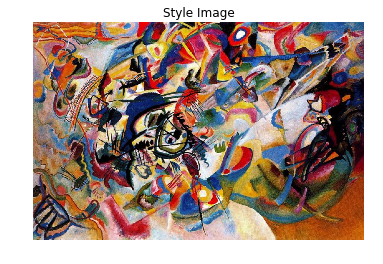

In [5]:
plt.title('Style Image')
plt.imshow(style_image)
plt.axis('off')

In [6]:
# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

In [7]:
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

In [8]:
# Load TF-Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [9]:
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

In [10]:
stylized_image_reshape = tf.reshape(stylized_image,shape=(stylized_image.shape[1:]))

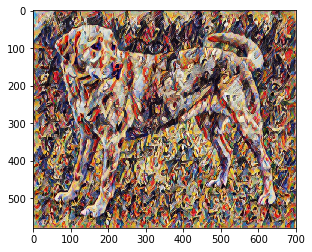

In [11]:
plt.imshow(stylized_image_reshape.numpy())